In [ ]:
import tensorflow as tf
tf.__version__


'2.8.2'

In [ ]:
#Load dataset from tf
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets
mnist = tf.keras.datasets.fashion_mnist

Calling 'load_data()' on 'mnist' object
will give 2 lists, which are training and testing fashion items and their labels.

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Show training image datasets. 
  

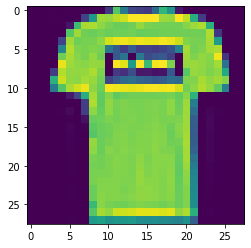

In [ ]:
from IPython.core.display import publish_display_data
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth = 200)
#plt.imshow(X_train[0]) # >>> boot
plt.imshow(X_train[1]) # >>> shirt

Print its value.

In [ ]:
print(X_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

The values are between 0 and 255. But we can **normalize** it to make the value as between 0 and 1 just by doing this:

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

Now the image value is between 0 and 1.
Next, we build the model to train and test the data.

## Neural Network
-----------------
### What is Neural Network?
In AI, it's a method that teaches computer to process data in a way that is inspired by human brain.
Called as part of deep learning, that uses *interconnected nodes (neurons)* in a layered structure resembles the *human brain*.

Things that makes neural network important:
- Able to comprehend unstructured data and make *general* observation without explicit training. i.e with different input sentences that have similar meaning, neural network could know that both mean the same thing.
- Can analyze more deeply and reveal new insights that might not have been trained before. For example, neural network analyses consumer purchases by comparing the buying patterns of numerous users can suggest new items that might interest a specific consumer.
- Learn and improve over time based on user behavior. i.e Auto-correction.
- Learn and model highly volatile data. i.e DNA analysis that has complex data.


### How Neural Network Works?
Inspired by human brain work, similarly, an Artificial Neural Network is made of *Artifical Neurons*. **Artifical Neurons** are software module, called **Nodes** while Artificial Neural Networks are software program.

Neural Network has interconnected artifical neurons in 3 layers:
1. **Input Layer** 
  > Process the input data, analyze or categorize it and pass it on to the next layer. The input data based on the number of feature, for ex. if you have matrix N x 2, this layer will take this 2 numbers of features as the input.
2. **Hidden Layer**
  > Artifical NN can have several hidden layers with millions of artificial neurons linked together. **Weight** is a number represents the connections between one node and another node.

  > Analyzes the output from previous layer(Input layer) and pass it on to next layer.
3. **Output Layer**
  > Gives the final result.


* *nb. Deep neural network need millions of example of training data.*

### Deep Learning vs Machine Learning
Machine learning methods require human input for the machine learning software to work sufficiently well. A data scientist manually determines the set of relevant features that the software must analyze. This limits the software’s ability, which makes it tedious to create and manage.

On the other hand, in deep learning, the data scientist gives only raw data to the software. The deep learning network derives the features by itself and learns more independently. It can analyze unstructured datasets like text documents, identify which data attributes to prioritize, and solve more complex problems*.

*https://aws.amazon.com/what-is/neural-network/




In [ ]:
from os import name
import tensorflow as tf

#Callback if the accuracy you want reach or not as your desire
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss'))<0.4:
      print('\nReached 60% accuracy so cancel the training')
      self.model.stop_training = True

# Define model
callbacks=MyCallback()
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(name="h1", units=256, activation=tf.nn.relu), #hidden layer
    tf.keras.layers.Dense(name="h2", units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(name="output", units=10, activation=tf.nn.softmax)]) # min units (for last item) >= number of data

**Sequential**: defines a SEQUENCE of layers in Neural Network.

**Flatten()**: Flatten matrix to one dimension. i.e [[2],[3],[4],[1]] -> [2,3,4,1]

**Dense**: adds a layer of neurons. '128' is **units**: Positive integer, dimensionality of the output space (number of neurons).

**Activation**: defines a layer of neurons what to do.

**Relu**: If X>0 then X, else return 0 (only passes value 0 or greater to next layer).

**Softmax**: Takes a set of value, pick the biggest value then set it '1' meanwhile others = 0. i.e [0.2, 0.1, 2.2]->[0,0,1]

In [ ]:
# Build the defined model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])
# Here we're gonna train the machine to recognize the images 5x
model.fit(X_train, y_train, epochs=5, callbacks=[callbacks])
#Check how much accuracy the machine can recognizes the images per epoch


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4646 - accuracy: 0.8295
Epoch 2/5
1865/1875 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8694
Reached 60% accuracy so cancel the training
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3545 - accuracy: 0.8694


In the 1st training, machine is already able to recognize the images with accuracy 82%.
After 5th training/epoch, the accuracy that machine successfully recognize is 89%.

Now let's test machine with test_data, can machine recognize test_image as well as it did with data it was trained on.

In [ ]:
model.evaluate(X_test, y_test)

result_pred = model.predict(X_test)
print(result_pred.shape)

313/313 [==============================] - 1s 1ms/step - loss: 1.0784 - accuracy: 0.5592
(10000, 10)


# Convolutional Neural Network

#### ANN vs. CNN

**ANN**
  uses weight (b) and activation to learn, weight get changed after each iteration through neuron.
  Layers in ANN are rows of data  


**CNN**
  There is no weight / neuron in CNN, instead casts *multiple layers on images and do filtration on that image to get image inputs*. 

<img src="https://vitalflux.com/wp-content/uploads/2022/04/Typical-CNN-architecture.png" width=500 />

### Image Classification
**ANN**
- ANN, for example, let's say we want to distinguish between dog and cat, the features of them such as the width of their nose, the length of their ears must be explicitly provided as data points.
- 2D images need to be converted to 1D vectors

**CNN**
- Meanwhile, for CNN, the features of a image can be extracted from image input, cnn is able to gather this on its own (automatically detects), instead of having to measure each individual feature.


### Data Classification
**ANN** is ideal for this classification

**Convolutional Layer**: Filtering, called kernels applied to input image.
The output is a feature map (input image with filters applied).

**Pooling (penyatuan) Layer**: reduces dimensions of the feature maps.
2 types of pooling:
1. Max Pooling: Pooling process that takes the maximum number from a feature map.
2. Avg Poooling: Pooling process that calculates the mean value of a set of matrix.
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png" width=500/>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png" width=500/>

****stride** = distance between one set (window) of a matrix to another matrix.
</br>
</br>

**Fully Connected Layer**: Takes the features from previous layers then do classification.

In [ ]:
#MAXPOOLING2D & AVERAGE POOL
import numpy as np
import tensorflow as tf

x = np.array([[2,2,7,3],
              [9,4,6,1],
              [8,5,2,4],
              [3,1,2,6]])

# 1: n-row 1st list, 4: n-col 1st list
# 4: n-row in 1st, 1: n-col in 1st 
x = x.reshape(1,4,4,1) # 4D
print(x)

model = tf.keras.Sequential(layers=[tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), strides=(2,2), padding='valid'
)])

#result = model(x) # >>> [[9],[7],[8],[6]] OR
output = model.predict(x)
output = np.squeeze(output)
print(output)



[[[[2]
   [2]
   [7]
   [3]]

  [[9]
   [4]
   [6]
   [1]]

  [[8]
   [5]
   [2]
   [4]]

  [[3]
   [1]
   [2]
   [6]]]]
[[9 7]
 [8 6]]
